[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



(a) Hair Color (blonde, black, ginger, brown)

(b) Age (years)

(c) Number of fans in a stadium

(d) Height of a person

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Needed to change this to seperate Nation and CO2 into seperate columns to make it easier to call specific columns.
carbon_west = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat", delim_whitespace=True, names=["Nation", "CO2"])
# ALSO needed to convert it from a string to an int because it is impossible to run math on string
carbon_west['CO2'] = pd.to_numeric(carbon_west['CO2'], errors='coerce')

Part a. Construct a histogram of CO2 emissions.

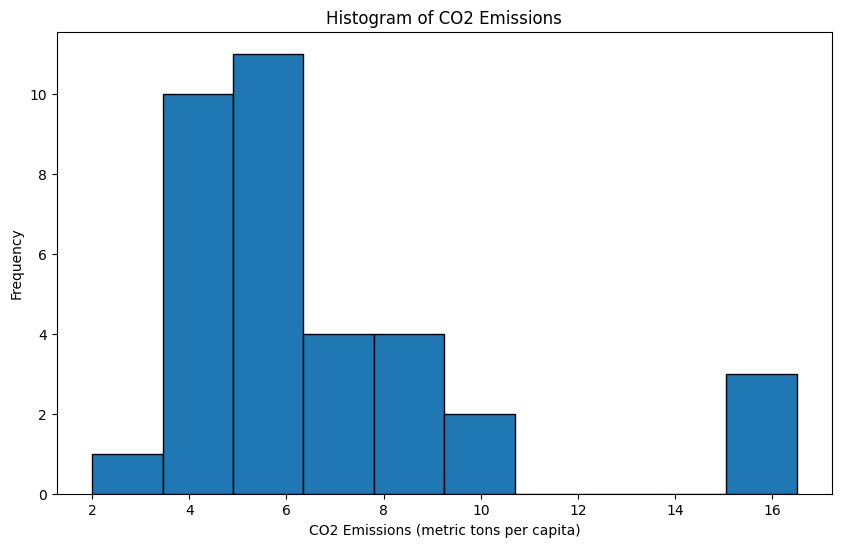

In [56]:
plt.figure(figsize=(10,6))
plt.hist(carbon_west['CO2'], bins=10, edgecolor='black')
plt.title('Histogram of CO2 Emissions')
plt.xlabel('CO2 Emissions (metric tons per capita)')
plt.ylabel('Frequency')

plt.show()

*Part* b. Find the mean, median, and standard deviation.

In [57]:
CWCo2Mean = carbon_west['CO2'].mean()
CWCo2Median = carbon_west['CO2'].median()
CWCo2STD = carbon_west['CO2'].std()

print("Mean:", CWCo2Mean)
print("Median:", CWCo2Median)
print("Standard Deviation:", CWCo2STD)

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [71]:
murders = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Murder.dat", delim_whitespace=True, names=["state", "murder"], skiprows=1)
murders['murder'] = pd.to_numeric(murders['murder'], errors='coerce')
murders_without_dc = murders[murders['state'] != 'DC']

Part a. Find the mean and standard deviation for murders without D.C.

In [72]:
murderMean = murders_without_dc['murder'].mean()
murdersSTD = murders_without_dc['murder'].std()

print("Mean:", murderMean)
print("Standard Deviation:", murdersSTD)

Mean: 4.874
Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [74]:
five_number_summary = murders_without_dc['murder'].describe(percentiles=[0.25, 0.5, 0.75])
print(five_number_summary)

count    50.000000
mean      4.874000
std       2.586291
min       1.000000
25%       2.625000
50%       4.850000
75%       6.175000
max      12.400000
Name: murder, dtype: float64


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [75]:
five_number_summary_with_dc = murders['murder'].describe(percentiles=[0.25, 0.5, 0.75])
print(five_number_summary_with_dc)

# The mean (when compared to the median) and range (when compared to the inter-quartile range) are more affected by the outlier (DC)

count    51.000000
mean      5.252941
std       3.725391
min       1.000000
25%       2.650000
50%       5.000000
75%       6.450000
max      24.200000
Name: murder, dtype: float64


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [80]:
houses = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Houses.dat", delim_whitespace=True)

    case   price  size  new  taxes  bedrooms  baths
0      1  419.85  2048    0   3104         4      2
1      2  219.75   912    0   1173         2      1
2      3  356.55  1654    0   3076         4      2
3      4  300.00  2068    0   1608         3      2
4      5  239.85  1477    0   1454         3      3
..   ...     ...   ...  ...    ...       ...    ...
95    96  264.00  1060    0    990         2      2
96    97  294.75  1730    0   3030         3      2
97    98  198.30  1370    0   1580         3      2
98    99  132.60  1560    0   1770         3      2
99   100  190.80  1340    0   1430         3      2

[100 rows x 7 columns]


Part a. Construct a scatterplot between square feet and price of a home.

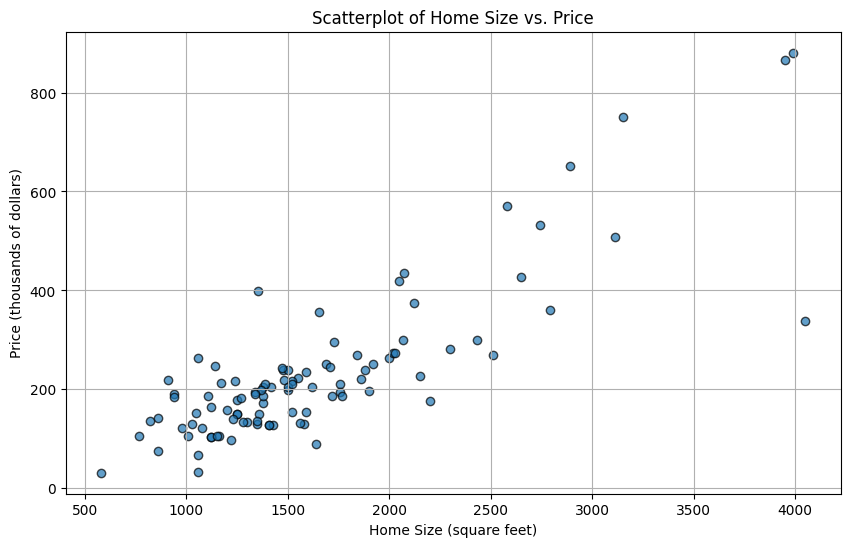

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(houses['size'], houses['price'], alpha=0.7, edgecolors='black')
plt.title('Scatterplot of Home Size vs. Price')
plt.xlabel('Home Size (square feet)')
plt.ylabel('Price (thousands of dollars)')
plt.grid(True)

plt.show()

Part b. Find the correlation between the two variables.

In [82]:
correlation = houses['size'].corr(houses['price'])

print(f"Correlation between size and price: {correlation}")

Correlation between size and price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.



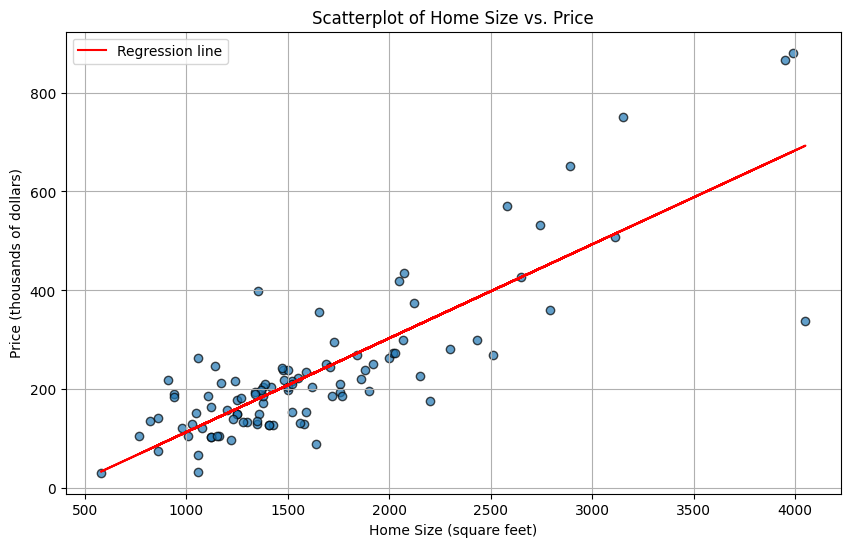

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(houses['size'], houses['price'], alpha=0.7, edgecolors='black')

slope, intercept = np.polyfit(houses['size'], houses['price'], 1)

plt.plot(houses['size'], slope * houses['size'] + intercept, color='red', label='Regression line')

plt.title('Scatterplot of Home Size vs. Price')
plt.xlabel('Home Size (square feet)')
plt.ylabel('Price (thousands of dollars)')
plt.grid(True)
plt.legend()

plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

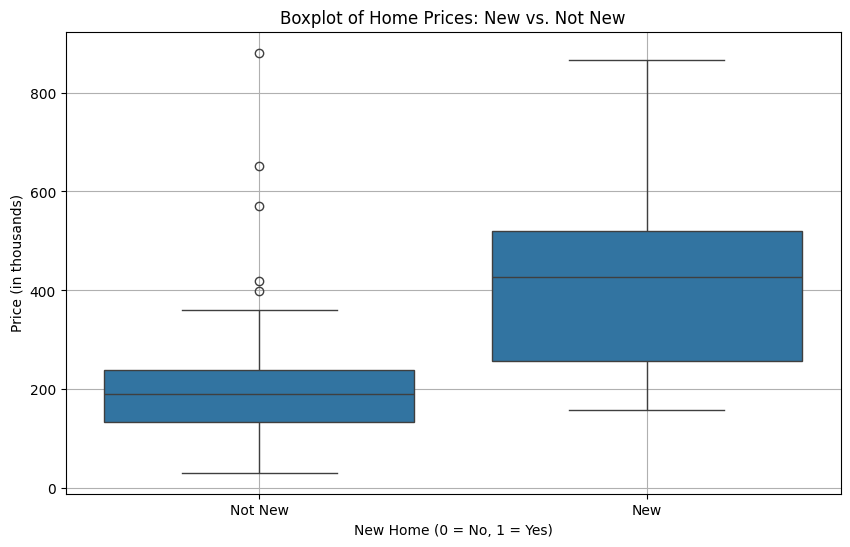

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(x='new', y='price', data=houses)

plt.title('Boxplot of Home Prices: New vs. Not New')
plt.xlabel('New Home (0 = No, 1 = Yes)')
plt.ylabel('Price (in thousands)')
plt.xticks([0, 1], ['Not New', 'New'])

plt.grid(True)
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

Betwen the size and price, there is a positive relationship, as we can see that the larger homes have higher prices. Between New vs Not New homes, we can see new homes are priced higher, making the price distribution for new homes considerably higher.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [88]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", delim_whitespace=True)

      subject  happiness  marital  gender
0           1          1        1    male
1           2          1        1    male
2           3          1        1    male
3           4          1        1    male
4           5          1        1    male
...       ...        ...      ...     ...
2137     2138          3        3  female
2138     2139          3        3  female
2139     2140          3        3  female
2140     2141          3        3  female
2141     2142          3        3  female

[2142 rows x 4 columns]


In [89]:
contingency_table = pd.crosstab(happy['marital'], happy['happiness'])

print(contingency_table)

happiness    1    2    3
marital                 
1          432  504   61
2           92  282  103
3          124  409  135
